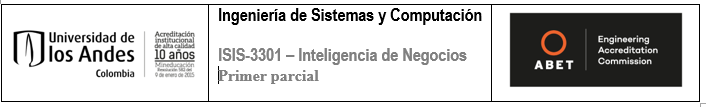

## Código de honor

“Al entregar la solución de este parcial, yo, Santiago Martínez Novoa con código 202112020 me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.

## Respuestas a las preguntas del parcial
1. [10%] Defina el enfoque analítico que va a darle al proyecto e incluya su justificación.
Recuerde incluir los tipos de aprendizaje, tareas de aprendizaje y técnicas de aprendizaje automático
que va a utilizar para lograr los objetivos que persigue la organización. De igual manera, no olvide
explicarle a los directivos de la organización que lo contrata, la razón por la cual su propuesta es
apropiada.

Para el proyecto de análisis de datos de AlpesAir, se ha elegido un enfoque basado en el aprendizaje supervisado, concretamente utilizando algoritmos de clasificación. En particular, se propone emplear el algoritmo de Árbol de Decisión y Clasificación CART debido a su capacidad para identificar y separar las características de los usuarios según su grado de satisfacción. Estos algoritmos son altamente interpretables, lo que facilita la comprensión de los resultados por parte de los directivos de AlpesAir. Además, permiten identificar las características más relevantes que influyen en la satisfacción del cliente, ofreciendo insights valiosos para mejorar el servicio. Su flexibilidad para manejar diferentes tipos de datos tanto numéricos como categóricos, junto con su eficiencia computacional, los convierte en una elección adecuada para analizar grandes volúmenes de información de manera rápida y efectiva, lo que ayudará a AlpesAir a comprender mejor las necesidades y preferencias de sus clientes y tomar decisiones estratégicas fundamentadas en los datos. Como son tan pocos datos se decidió no separar en datos de validación y datos de entrenamiento sino en cambio utilizar cross validation para las métricas de validación del algoritmo.
 
2. [30%] Describa y haga un análisis del resultado del análisis de calidad de los datos suministrados (anexos a este enunciado) que hace parte de la fase de entendimiento de los datos de la metodología ASUM-DM. De igual manera, muestre un subconjunto de los datos luego del preprocesamiento que analítico propuesto y explique y justifique las tareas de transformación que hizo.

Luego de haber realizado el perfilamiento de los datos se encontraron registros con datos vacíos, valores por fuera de los rangos, valores que requieren transformaciones para que cumplan con el formato establecido y categorías ambiguas que se decidieron modificar (Ver parte final del perfilamiento de los datos). De acuerdo a estos hallazgos se tomaron las siguientes decisiones bajo las 4 dimensiones de calidad de los datos: 
Las decisiones se tomarán de acuerdo a los siguientes 4 dimensiones de calidad:

#### Consistencia
**Decisión 1:** Eliminar registros en la columna `Sexo` que contengan valores vacíos, cómo representan un porcentaje muy pequeño de los datos (1.4%) se pueden quitar y no perder información representativa. Adicionalmente también se transformarán los valores de aquellos registros donde no se cumpla con el estandar de M y F para el sexo.

**Decisión 2:** Eliminar la columna `id` pues no provee ningun tipo de valor a la hora de clasificar a los clientes bajo las categorías definidas por la empresa.

**Decisión 5:** Para hacer más claro al negocio la separación de sus viajeros se decidió reemplazar en la columna de `satisfaccion` la opción de "neutro o insatisfecho" por simplemente "insatisfecho", simplemente porque al final cualquier cliente que no esté satisfecho es un área donde se puede mejorar algun componente de la experiencia de este comprador.

#### Validez
**Decisión 3:** Eliminar los registros que se encuentran por fuera del rango [0-5] en las columnas de `SatComidaBebidas` y `SatServicioAbordo` para asegurar valores correctos para todos los viajeros presentes en el dataset.

**Decisión 4:** Transformar los valores numéricos que se encuentran escritos con palabras en la columna `SatPuntualidad` para que todos los valores en esta columna sean numéricos y facilite la clasificación.

#### Unicidad
Los valores ya cumplen con esta dimensión pues no existen registros duplicados en el dataset
#### Completitud
**Decisión 1:** La decisión 1 también mejora la completitud de los datos



3. [15%] Muestre el resultado que arroja la ejecución del modelo de analítica propuesto, con los datos suministrados para la consultoría. Explique cómo el resultado obtenido responde a los objetivos de la organización que lo contrató y si es posible o no utilizar dicho modelo en la organización. Recuerde argumentar sus decisiones con base en la interpretación cuantitativa y cualitativa de los resultados del modelo.




## Anexo Notebook ejecutado

#### Diccionario de los datos

- Sexo: Sexo del pasajero (F, M)
- TipoCliente: (Cliente frecuente, cliente esporádico)
- Edad: Edad actual del pasajero
- TipoViaje: Propósito del viaje personal o negocios(Personal, Negocios)
- Clase: Clase en la que viaja el pasajero (Negocios, Económica, Muy económica)
- DistanciaRecorrida: Distancia recorrida en el viaje
- SatServicioWifi: Nivel de satisfacción del servicio de wifi (0:No Aplica;1-5)
- SatPuntualidad: Nivel de satisfcción de la puntualidad 
- SatComidaBebidas: Nivel de satisfaccón con comida y bebidas
- ComodidadSilla: Nivel de satisfaccón con la comodidad de la silla
- SatEntretenimiento: Nivel de satisfaccón con el entretenimiento provisto en el viaje
- SatServicioAbordo: Nivel de satisfaccón con el servicio a bordo
- NivelLimpieza: Nivel de satisfaccón con la limpieza del avión
- MinRetrasoSalida: Minutos de retraso en la salida
- Satisfaccion: Nivel de satisfacción con el vuelo(Satisfecho, neutro o insatisfecho)

__Aclaraciones:__

Los niveles de satisfacción varí­an en un rango de 0 a 5
Clase negocios no existe, existe clase ejecutiva.

## 0. Preparación inicial
### 0.1. Importar librerías

In [313]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
import graphviz
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay
from sklearn.calibration import cross_val_predict
from sklearn.model_selection import cross_val_score


#Librerías extras
import itertools
import os

from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.4.1.post1


### 0.2. Carga de datos

In [276]:
train = pd.read_csv('./data/SatisfaccionAlpesAirMuestra.csv', sep=';',)
train.head()

,id,Sexo,TipoCliente,Edad,TipoViaje,Clase,DistanciaREconomicarrida,SatServicioWifi,SatPuntualidad,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida,satisfaccion
0,63296,M,Frecuente,16,Negocios,Ejecutiva,3192,3,2,300,3,3,3,3,31,neutro o insatisfecho
1,73453,F,Frecuente,7,Personal,Economica,1012,3,5,5,2,5,2,5,26,neutro o insatisfecho
2,1316,F,Frecuente,39,Negocios,Ejecutiva,2204,1,1,3,4,4,4,3,0,satisfecho
3,128845,F,Frecuente,9,Personal,Economica,2475,4,2,4,5,1,5,5,0,neutro o insatisfecho
4,32338,M,Frecuente,56,Negocios,Ejecutiva,3344,0,5,3,4,2,2,5,0,satisfecho


## 1. Entendimiento de los datos

### 1.1. Exploración de los datos

Es fundamental entender el dataset, por lo que primero que se revisará es el diccionario de los datos. Luego de entenderlos se procederá a buscar anomalías en los datos con la ayuda de panmdas profiling y un par de consultas sencillas.

In [277]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1000 non-null   int64 
 1   Sexo                      1000 non-null   object
 2   TipoCliente               1000 non-null   object
 3   Edad                      1000 non-null   int64 
 4   TipoViaje                 1000 non-null   object
 5   Clase                     1000 non-null   object
 6   DistanciaREconomicarrida  1000 non-null   int64 
 7   SatServicioWifi           1000 non-null   int64 
 8   SatPuntualidad            1000 non-null   object
 9   SatComidaBebidas          1000 non-null   int64 
 10  ComodidadSilla            1000 non-null   int64 
 11  SatEntretenimiento        1000 non-null   int64 
 12  SatServicioAbordo         1000 non-null   int64 
 13  NivelLimpieza             1000 non-null   int64 
 14  MinRetrasoSalida         

Parece no haber valores nulos dentro del dataset.

In [278]:
train.describe()

,id,Edad,DistanciaREconomicarrida,SatServicioWifi,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,65500.670000,39.643000,1183.202000,2.701000,4.965000,3.413000,3.349000,3.3340,3.243000,16.082000
std,38003.404303,15.386953,996.901015,1.357734,22.971972,1.317637,1.320205,1.3146,1.322006,44.380885
min,126.000000,7.000000,67.000000,0.000000,0.000000,1.000000,1.000000,-1.0000,1.000000,0.000000
25%,32161.500000,27.000000,412.500000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,0.000000
50%,65798.500000,40.000000,850.500000,3.000000,3.000000,4.000000,4.000000,4.0000,3.000000,0.000000
75%,98936.500000,52.000000,1739.000000,4.000000,4.000000,4.000000,4.000000,4.0000,4.000000,14.000000
max,129767.000000,80.000000,3995.000000,5.000000,300.000000,5.000000,5.000000,5.0000,5.000000,794.000000


Aquí ya puede evidenciarse algunas discrepancias de rango con respecto a lo estipulado en el diccionario de datos. Será necesario mirarlo más a fondo en el perfilamiento de los datos.

In [279]:
print(f"El número de atributos es: {train.shape[1]} y el número de instancias es: {train.shape[0]}")

El número de atributos es: 16 y el número de instancias es: 1000


In [280]:
print("Total de registros duplicados iniciales: ",train.duplicated(keep = False).sum())

Total de registros duplicados iniciales:  0


In [281]:
#Profiling del dataset
profile = ProfileReport(train, title="Pandas Profiling Report", explorative=True)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Ejecutiva'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Luego de realizar los datos se realizará un análisis columna por columna para identificar las transformaciones necesarias:

- Para la clasificación de los clientes la columna de `id` no provee ningún tipo de valor y por lo tanto se decide eliminar.
- Para la columna `Sexo` existen valores que requieren transformación, así como valores vacíos que deben ser eliminados.
- Para `SatPuntualidad` existen valores de cuatro que están escrito en palabras y deben ser transformadas a número.
- Para `SatComidaBebidas` y `SatServicioAbordo` hay valores por fuera de los rangos establecidos y por lo tanto deben ser removidos.
- Para `satisfaccion` como solo hay dos posibles elementos se decide reemplazar neutro o insatisfecho por simplemente insatisfecho para facilitar la interpretabilidad.


#### Consistencia
**Decisión 1:** Eliminar registros en la columna `Sexo` que contengan valores vacíos, cómo representan un porcentaje muy pequeño de los datos (1.4%) se pueden quitar y no perder información representativa. Adicionalmente también se transformarán los valores de aquellos registros donde no se cumpla con el estandar de M y F para el sexo.

**Decisión 2:** Eliminar la columna `id` pues no provee ningun tipo de valor a la hora de clasificar a los clientes bajo las categorías definidas por la empresa.

**Decisión 5:** Para hacer más claro al negocio la separación de sus viajeros se decidió reemplazar en la columna de `satisfaccion` la opción de "neutro o insatisfecho" por simplemente "insatisfecho", simplemente porque al final cualquier cliente que no esté satisfecho es un área donde se puede mejorar algun componente de la experiencia de este comprador.

**Decisión 6:** Como el algoritmo no maneja directamente variables categóricas se realizará la transformación utilizando el OneHotEncoder para evitar órdenes implícitos entre las categorías.

#### Validez
**Decisión 3:** Eliminar los registros que se encuentran por fuera del rango [0-5] en las columnas de `SatComidaBebidas` y `SatServicioAbordo` para asegurar valores correctos para todos los viajeros presentes en el dataset.

**Decisión 4:** Transformar los valores numéricos que se encuentran escritos con palabras en la columna `SatPuntualidad` para que todos los valores en esta columna sean numéricos y facilite la clasificación.

#### Unicidad
Los valores ya cumplen con esta dimensión pues no existen registros duplicados en el dataset
#### Completitud
**Decisión 1:** La decisión 1 también mejora la completitud de los datos


## 2. Transformación de los datos


### Decisión 1
Se realizará la eliminación de los registros vacíos

In [282]:
# Eliminar registros con un espacio en Sexo
train = train[train["Sexo"] != " "]

#Comprobar que no hay registros vacíos
train["Sexo"].unique()

array(['M', 'F', 'Male', 'Female'], dtype=object)

In [283]:
#Transformar Male a M y Female a F
train["Sexo"] = train["Sexo"].apply(lambda x: 'M' if x == 'Male' else ('F' if x == 'Female' else x))

#Comprobar transformación
train["Sexo"].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_14788\771244409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sexo"] = train["Sexo"].apply(lambda x: 'M' if x == 'Male' else ('F' if x == 'Female' else x))


array(['M', 'F'], dtype=object)

### Decisión 3
Se elimina columna `id`

In [284]:
#Eliminar columna ID
train = train.drop(columns=["id"])

#Comprobar que se ha eliminado la columna
train.head()

,Sexo,TipoCliente,Edad,TipoViaje,Clase,DistanciaREconomicarrida,SatServicioWifi,SatPuntualidad,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida,satisfaccion
0,M,Frecuente,16,Negocios,Ejecutiva,3192,3,2,300,3,3,3,3,31,neutro o insatisfecho
1,F,Frecuente,7,Personal,Economica,1012,3,5,5,2,5,2,5,26,neutro o insatisfecho
2,F,Frecuente,39,Negocios,Ejecutiva,2204,1,1,3,4,4,4,3,0,satisfecho
3,F,Frecuente,9,Personal,Economica,2475,4,2,4,5,1,5,5,0,neutro o insatisfecho
4,M,Frecuente,56,Negocios,Ejecutiva,3344,0,5,3,4,2,2,5,0,satisfecho


### Decisión 3 
Asegurar que las columnas de `SatComidaBebidas` y `SatServicioAbordo` tengan sus valores en los valores establecidos

In [285]:
#Eliminar valores fuera de rango en las columnas de `SatComidaBebidas` y `SatServicioAbordo` [0-5]
train = train[(train["SatComidaBebidas"] >= 0) & (train["SatComidaBebidas"] <= 5)]
train = train[(train["SatServicioAbordo"] >= 0) & (train["SatServicioAbordo"] <= 5)]

#Comprobar que se han eliminado los valores fuera de rango
train.describe()

,Edad,DistanciaREconomicarrida,SatServicioWifi,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.00000,975.000000,975.000000
mean,39.735385,1185.422564,2.702564,3.186667,3.417436,3.358974,3.36000,3.247179,16.112821
std,15.361013,1000.942830,1.365362,1.331974,1.325436,1.323597,1.28274,1.327884,44.632996
min,7.000000,67.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000
25%,27.000000,412.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,0.000000
50%,40.000000,846.000000,3.000000,3.000000,4.000000,4.000000,4.00000,3.000000,0.000000
75%,52.000000,1739.000000,4.000000,4.000000,5.000000,4.000000,4.00000,4.000000,14.000000
max,80.000000,3995.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,794.000000


### Decisión 4
Se procederá a tratar los valores numéricos que se encuentran escritos con palabras en la columna `SatPuntualidad`

In [286]:
#Transformar los valores 'Cuatro' en la columna `SatPuntualidad` a 4
train["SatPuntualidad"] = train["SatPuntualidad"].apply(lambda x: '4' if x == 'Cuatro' else x)

#Comprobar que se ha transformado el valor
train["SatPuntualidad"].unique()

array(['5', '1', '2', '3', '4', '0'], dtype=object)

Ahora que no hay más valores de texto donde deberían ser numéricos se asegura que las columnas tengan ese tipo.

In [287]:
#Cambiar el tipo de dato de las columnas `SatPuntualidad`, `SatComidaBebidas` y `SatServicioAbordo` a numérico
train["SatPuntualidad"] = pd.to_numeric(train["SatPuntualidad"])
train["SatComidaBebidas"] = pd.to_numeric(train["SatComidaBebidas"])
train["SatServicioAbordo"] = pd.to_numeric(train["SatServicioAbordo"])

#Comprobar que se ha cambiado el tipo de dato
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sexo                      975 non-null    object
 1   TipoCliente               975 non-null    object
 2   Edad                      975 non-null    int64 
 3   TipoViaje                 975 non-null    object
 4   Clase                     975 non-null    object
 5   DistanciaREconomicarrida  975 non-null    int64 
 6   SatServicioWifi           975 non-null    int64 
 7   SatPuntualidad            975 non-null    int64 
 8   SatComidaBebidas          975 non-null    int64 
 9   ComodidadSilla            975 non-null    int64 
 10  SatEntretenimiento        975 non-null    int64 
 11  SatServicioAbordo         975 non-null    int64 
 12  NivelLimpieza             975 non-null    int64 
 13  MinRetrasoSalida          975 non-null    int64 
 14  satisfaccion              975 n

### Decisión 5
Ahora se finaliza realizando la transformación mencionada.

In [288]:
# Cambiar las cadenas 'neutro o insatisfecho' por solo 'insatisfecho' en la columna `satisfaccion`
train["satisfaccion"] = train["satisfaccion"].apply(lambda x: 'insatisfecho' if x == 'neutro o insatisfecho' else x)

#Comprobar que se ha cambiado la cadena
train["satisfaccion"].unique()

array(['insatisfecho', 'satisfecho'], dtype=object)

### Decisión 6

Ahora se realizará el OneHotEncoder para las variables categóricas.

In [289]:
#Manejar variables categóricas utilizando OneHotEncoder
#Columnas categóricas
categorical_columns = train.select_dtypes(include=['object']).columns
categorical_columns

Index(['Sexo', 'TipoCliente', 'TipoViaje', 'Clase', 'satisfaccion'], dtype='object')

In [290]:
#Transformador para las columnas categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#Transformar las columnas categóricas y guardar el resultado en un DataFrame
categorical_data = pd.DataFrame(categorical_transformer.fit_transform(train[categorical_columns]).toarray())

column_names = categorical_transformer.get_feature_names_out(input_features=categorical_columns)

# Assign the column names to the DataFrame
categorical_data.columns = column_names

# Display the transformed DataFrame
categorical_data

#Eliminar las columnas categóricas del DataFrame original
train = train.drop(columns=categorical_columns)

#Concatenar el DataFrame original con el DataFrame transformado
train = pd.concat([train, categorical_data], axis=1)

#Comprobar que se han eliminado las columnas categóricas
train.head()




,Edad,DistanciaREconomicarrida,SatServicioWifi,SatPuntualidad,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida,...,Sexo_M,TipoCliente_Esporadico,TipoCliente_Frecuente,TipoViaje_Negocios,TipoViaje_Personal,Clase_Economica,Clase_Ejecutiva,Clase_MuyEconomicanomica,satisfaccion_insatisfecho,satisfaccion_satisfecho
1,7.0,1012.0,3.0,5.0,5.0,2.0,5.0,2.0,5.0,26.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,39.0,2204.0,1.0,1.0,3.0,4.0,4.0,4.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,9.0,2475.0,4.0,2.0,4.0,5.0,1.0,5.0,5.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,56.0,3344.0,0.0,5.0,3.0,4.0,2.0,2.0,5.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,37.0,1954.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,10.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Se procede a mostrar los datos una vez se ha finalizado las transformaciones y se realiza nuevamente un perfilamiento de los datos para comprobarlo.

In [291]:
#Mostrar datos transformados
train.head()




,Edad,DistanciaREconomicarrida,SatServicioWifi,SatPuntualidad,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida,...,Sexo_M,TipoCliente_Esporadico,TipoCliente_Frecuente,TipoViaje_Negocios,TipoViaje_Personal,Clase_Economica,Clase_Ejecutiva,Clase_MuyEconomicanomica,satisfaccion_insatisfecho,satisfaccion_satisfecho
1,7.0,1012.0,3.0,5.0,5.0,2.0,5.0,2.0,5.0,26.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,39.0,2204.0,1.0,1.0,3.0,4.0,4.0,4.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,9.0,2475.0,4.0,2.0,4.0,5.0,1.0,5.0,5.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,56.0,3344.0,0.0,5.0,3.0,4.0,2.0,2.0,5.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,37.0,1954.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,10.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

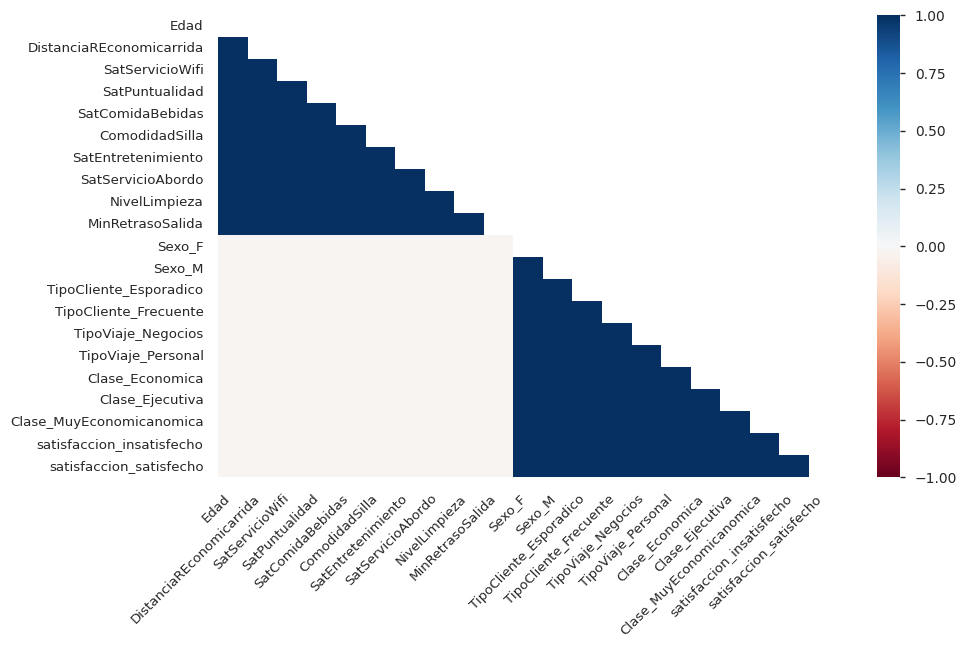

In [292]:
#Profiling del dataset
profile = ProfileReport(train, title="Pandas Profiling Report", explorative=True)
profile.to_file("output_after_transformations.html")

## 3. Modelamiento

### 3.1. Arbol de decisión y clasificación CART

Los árboles de clasificación y regresión (CART) son un tipo de algoritmo de aprendizaje supervisado que se utiliza para clasificar o llevar a cabo la regresión de los datos. Los CART son una alternativa al análisis tradicional de clasificación/discriminación o a la predicción tradicional (regresión). 
Los CART seleccionan las divisiones de mejor rendimiento y luego repiten este proceso de forma recursiva hasta encontrar el conjunto óptimo. El resultado es un árbol de decisión representado por una serie de divisiones binarias que conducen a nodos terminales que pueden ser descritos por un conjunto de reglas específicas. 

Para determinar las divisiones de mejor rendimiento este algoritmo utiliza por defecto el índice Gini que mide la impureza de un nodo mediante la siguiente ecuación:

$$
Gini(t) = 1 - \sum_{i=1}^{c} [p(i|t)]^2
$$

Donde:

- $t$ es el nodo actual.
- $c$ es el número de clases.
- $p(i∣t)$ es la proporción de la clase $i$ en el nodo $t$.






###  3.2. Separación entre X y Y

In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 1 to 966
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       975 non-null    float64
 1   DistanciaREconomicarrida   975 non-null    float64
 2   SatServicioWifi            975 non-null    float64
 3   SatPuntualidad             975 non-null    float64
 4   SatComidaBebidas           975 non-null    float64
 5   ComodidadSilla             975 non-null    float64
 6   SatEntretenimiento         975 non-null    float64
 7   SatServicioAbordo          975 non-null    float64
 8   NivelLimpieza              975 non-null    float64
 9   MinRetrasoSalida           975 non-null    float64
 10  Sexo_F                     975 non-null    float64
 11  Sexo_M                     975 non-null    float64
 12  TipoCliente_Esporadico     975 non-null    float64
 13  TipoCliente_Frecuente      975 non-null    float64
 14 

In [294]:
#Separar el dataset en atributos y etiquetas
X = train.drop(columns=["satisfaccion_satisfecho","satisfaccion_insatisfecho"])
y = train["satisfaccion_satisfecho"]

#Asegurarse que las etiquetas son enteros
y.fillna(0, inplace=True)
y = y.astype(int)
y.value_counts()


satisfaccion_satisfecho
0    569
1    426
Name: count, dtype: int64

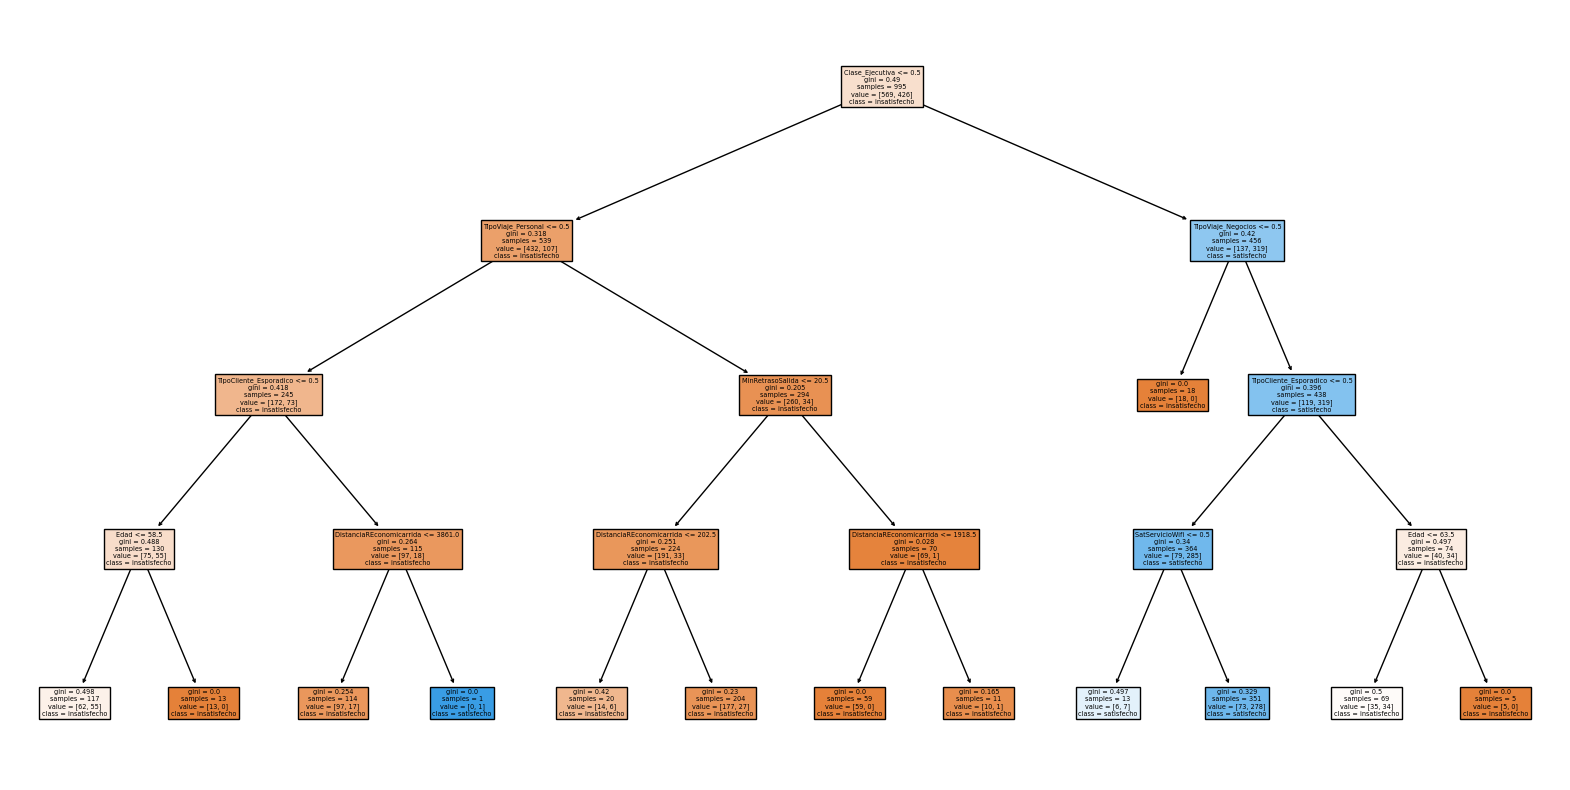

In [323]:


tree_clf = DecisionTreeClassifier(random_state=42, max_depth=4, criterion="gini")
tree_clf.fit(X, y)

#Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=["insatisfecho", "satisfecho"])
plt.show()


## Evaluación del modelo



Ahora se evaluarán las métricas de Precission y Recall para evaluar que tan bueno es el modelo. Como se dijo en un principio se realizará el cross validation para no perder datos valiosos para el entrenamiento.

<Figure size 800x600 with 0 Axes>

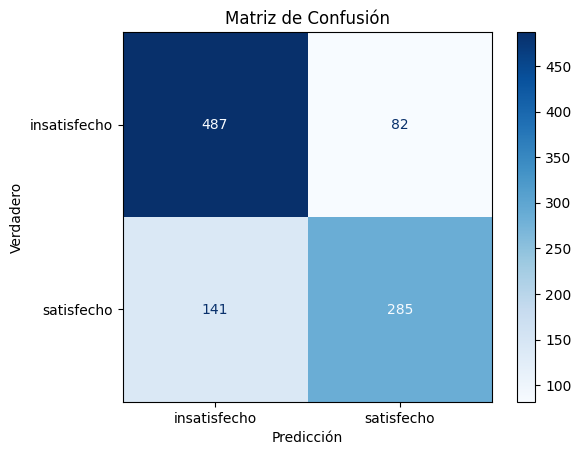

Reporte de clasificación:
              precision    recall  f1-score   support

insatisfecho       0.78      0.86      0.81       569
  satisfecho       0.78      0.67      0.72       426

    accuracy                           0.78       995
   macro avg       0.78      0.76      0.77       995
weighted avg       0.78      0.78      0.77       995



In [322]:
scores = cross_val_score(tree_clf, X, y, cv=5)  # Utilizando 5-fold cross-validation

# Obtener las predicciones de validación cruzada
y_pred_cv = cross_val_predict(tree_clf, X, y, cv=5)


# Plot de la matriz de confusión con etiquetas corregidas
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["insatisfecho", "satisfecho"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y, y_pred_cv, target_names=["insatisfecho", "satisfecho"]))



El análisis de las métricas obtenidas para el algoritmo muestra un rendimiento generalmente sólido pero con algunas áreas de mejora. La matriz de confusión revela que el modelo clasificó correctamente a 487 instancias como "insatisfecho" y 285 instancias como "satisfecho", sin embargo, cometió errores al clasificar 141 instancias como "insatisfecho" cuando en realidad eran "satisfecho", y 82 instancias como "satisfecho" cuando eran "insatisfecho". Esto indica que el modelo tiene cierta dificultad para distinguir entre estas dos clases, aunque muestra una tendencia a clasificar más instancias como "insatisfecho".

El reporte de clasificación proporciona más detalles sobre el rendimiento del modelo. La precisión general es del 78%, lo que significa que el modelo acierta cerca de 8 de cada 10 predicciones. El recall, que representa la proporción de instancias verdaderamente positivas que fueron identificadas correctamente, es del 86% para "insatisfecho" y del 67% para "satisfecho". Esto indica que el modelo tiene un mejor rendimiento en identificar las instancias de "insatisfecho" que las de "satisfecho".

## Conclusiones

Luego de validar con las métricas de evaluación que el algoritmo es viable se pasará a resaltar la información que le brinda el modelo a la organización. Al revisar detalladamente el árbol es fácil notar que existen varias hojas donde la pureza de gini es cercana al 100%. Entonces se puede revisar donde la pureza sea alta y adicionalmente la clase sea insatisfecho.

Dos grupos que resaltan mucho contienen las siguientes características:

Viaje en clase económica, de tipo personal que tenga una demora de mas de 20 minutos.
 viajes cortos pero con personas mayores de edad
